In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix

In [ ]:
from matplotlib import pyplot

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#load dataset
filename = 'Iris.csv'
names =['sepal-length', 'sepal-width', 'petal-length','petal-wedth', 'class']
dataset = read_csv(filename, names=names)

In [ ]:
#shape
dataset.shape

(151, 5)

In [ ]:
#head
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-wedth,class
Id,NaN,NaN,NaN,NaN,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
dataset = dataset.drop('Id')

In [ ]:
dataset.shape

(150, 5)

In [ ]:
#description
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-wedth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-wedth   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [ ]:
from pandas import to_numeric
for name in ['sepal-length', 'sepal-width', 'petal-length','petal-wedth']:
  dataset[name] = to_numeric(dataset[name],errors = 'coerce')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-wedth   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-wedth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Univariate Plot

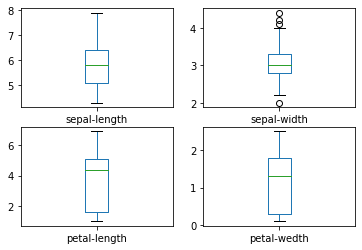

In [ ]:
#box and whisker plot
dataset.plot(kind='box', subplots = True, layout=(2,2), sharex = False, sharey=False)
pyplot.show()

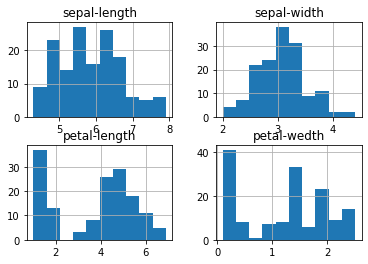

In [ ]:
#histogram
dataset.hist()
pyplot.show()

Multivariate Plot

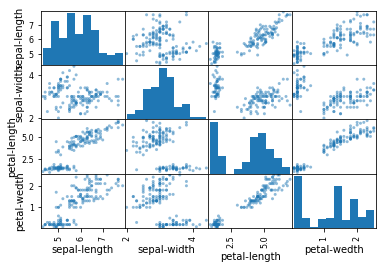

In [ ]:
# scatter plot
scatter_matrix(dataset)
pyplot.show()

In [ ]:
# Create validation dataset
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = validation_size, random_state = seed)

**Test Harness** .

**10-Fold cross validation**  => 9 train , 1 test and repeat for all combinations of tran-test splits.



**Metric of accuracy** => number of correct predicted divided by total 

In [ ]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s:  %f  (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR:  0.983333  (0.033333)
LDA:  0.975000  (0.038188)
KNN:  0.983333  (0.033333)
CART:  0.950000  (0.076376)
NB:  0.966667  (0.040825)
SVM:  0.983333  (0.033333)


LR, KNN, SVM have the largest accuracy

In [ ]:
# Make prediction
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



We can see that the accuracy is .9 or 90%. 
The confussion matrix shows there are 3 errors. 
callsification report provide breakdown of each class by precision, recall, f1-score and support showing excelent result.